In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import quad


In [38]:
def pdf_Reserve_Price(x):
    return (x - 900)

x = np.linspace(900, 1000, 101)
pr = pdf_Reserve_Price(x) / np.sum(pdf_Reserve_Price(x))

def profit(reserve_price, bid_1, bid_2):
    if reserve_price < bid_1:
        return 1000 - bid_1
    elif reserve_price < bid_2:
        return 1000 - bid_2
    else:
        return 0


# Define the profit function π(p) based on the given bids and price p
def profit_function(p, bid1, bid2):
    if p < bid1:
        return 1000 - bid1
    elif bid1 <= p < bid2:
        return 1000 - bid2
    else:
        return 0

# Define the PDF of p, f_p(p), with the normalization constant α computed as discussed
def pdf_p(p):
    alpha = 1 / 5000  # Normalizing constant calculated as the integral of (p - 900) over [900, 1000]
    return alpha * (p - 900) if 900 <= p <= 1000 else 0

# Compute the expected value of the profit function
def expected_profit(bid1, bid2):
    # Define the function to integrate: π(p) * f_p(p)
    def integrand(p):
        return profit_function(p, bid1, bid2) * pdf_p(p)
    
    # Compute the integral of π(p) * f_p(p) over the range [900, 1000]
    result, _ = quad(integrand, 900, 1000)
    return result

def probability_bid(mean_bid, bid, reserve_price):
    if bid < reserve_price:
        return 0
    elif reserve_price <= bid < mean_bid:
        return (1000 - mean_bid) / (1000 - bid)
    else:
        return 1

def profit_function_plus(p, bid1, bid2, mean_bid):
    if p < bid1:
        return 1000 - bid1
    elif bid1 <= p < bid2:
        return (1000 - bid2) * probability_bid(mean_bid, bid2, p)
    else:
        return 0

def probability_bid_zero(mean_bid, bid, reserve_price):
    if bid < reserve_price:
        return 0
    elif reserve_price <= bid < mean_bid - 3:
        return 0
    else:
        return 1
    
def profit_function_zero(p, bid1, bid2, mean_bid):
    if p < bid1:
        return 1000 - bid1
    elif bid1 <= p < bid2:
        return (1000 - bid2) * probability_bid_zero(mean_bid, bid2, p)
    else:
        return 0

# Compute the expected value of the profit function
def expected_profit_plus(bid1, bid2, mean_bid_2):
    # Define the function to integrate: π(p) * f_p(p)
    def integrand(p):
        return profit_function_plus(p, bid1, bid2, mean_bid_2) * pdf_p(p)
    
    # Compute the integral of π(p) * f_p(p) over the range [900, 1000]
    result, _ = quad(integrand, 900, 1000)

    return result

# Compute the expected value of the profit function
def expected_profit_zero(bid1, bid2, mean_bid_2):
    # Define the function to integrate: π(p) * f_p(p)
    def integrand(p):
        return profit_function_zero(p, bid1, bid2, mean_bid_2) * pdf_p(p)
    
    # Compute the integral of π(p) * f_p(p) over the range [900, 1000]
    result, _ = quad(integrand, 900, 1000)

    return result


In [4]:
# Generate bid values
bid_values = np.linspace(920, 1000, 101)

# Create a meshgrid of bid1 and bid2 values
B1, B2 = np.meshgrid(bid_values, bid_values)

# Initialize the profit matrix
Profit = np.zeros_like(B1)

# Populate the profit values where bid2 > bid1
for i in range(Profit.shape[0]):
    for j in range(Profit.shape[1]):
        if B2[i, j] > B1[i, j]:
            Profit[i, j] = expected_profit(B1[i, j], B2[i, j])


/var/folders/nm/_864_8xs5yq4fs16m6wrq56h0000gn/T/ipykernel_82381/3589071365.py:37: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, _ = quad(integrand, 900, 1000)


Maximum Profit: 20.41512954899341, Bid 1: 952.0, Bid 2: 978.4


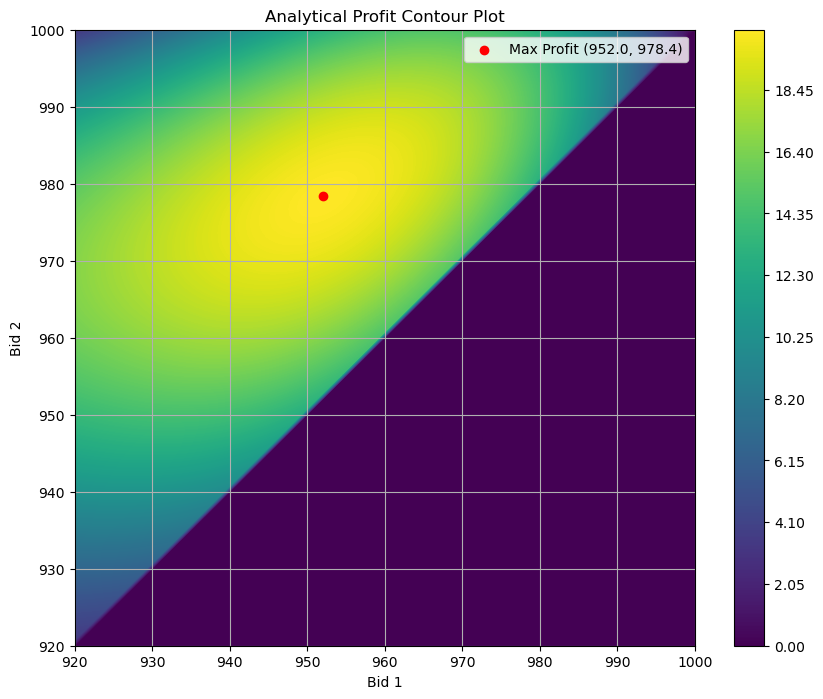

In [23]:
# Generate the contour plot
# Find the indices of the maximum profit
max_indices = np.unravel_index(np.argmax(Profit), Profit.shape)
max_profit = Profit[max_indices]
max_bid1, max_bid2 = B1[max_indices], B2[max_indices]
print(f'Maximum Profit: {max_profit}, Bid 1: {max_bid1}, Bid 2: {max_bid2}')

plt.figure(figsize=(10, 8))
contour = plt.contourf(B1, B2, Profit, levels=500, cmap='viridis')
plt.colorbar(contour)
plt.scatter(max_bid1, max_bid2, color='red', label=f'Max Profit ({max_bid1}, {max_bid2})')  # Mark the maximum point
plt.title('Analytical Profit Contour Plot')
plt.xlabel('Bid 1')
plt.ylabel('Bid 2')
plt.legend()
plt.grid(True)
plt.show()

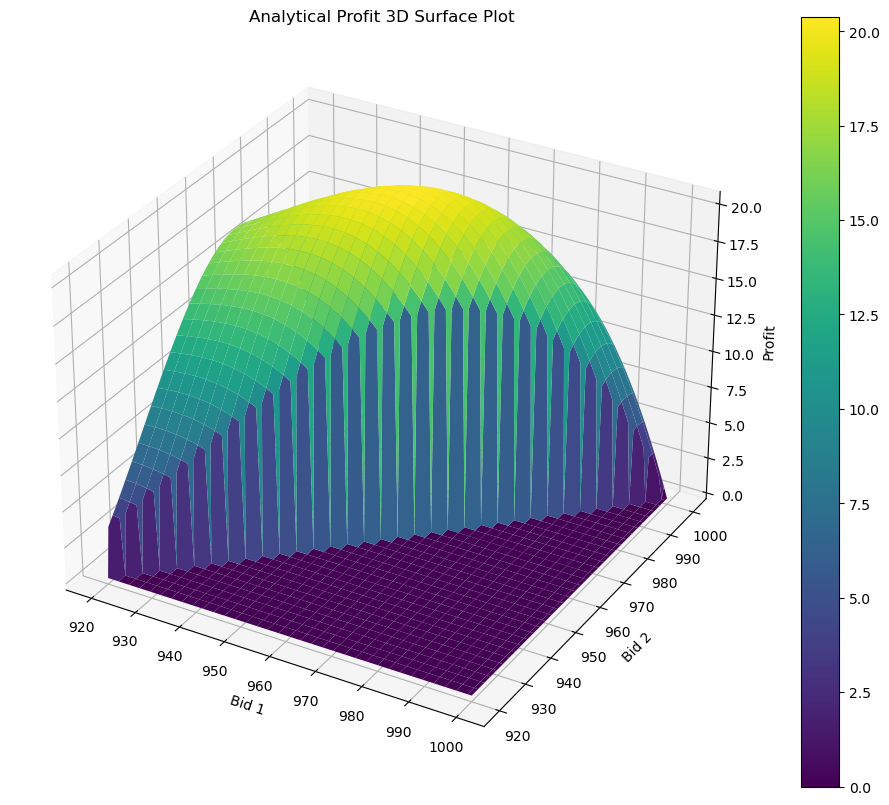

In [6]:
# 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(B1, B2, Profit, cmap='viridis', edgecolor='none')
fig.colorbar(surf)
ax.set_title('Analytical Profit 3D Surface Plot')
ax.set_xlabel('Bid 1')
ax.set_ylabel('Bid 2')
ax.set_zlabel('Profit')
plt.show()

In [42]:
# Generate bid values
bid_values_plus = np.linspace(920, 1000, 101)
B1_plus, B2_plus = np.meshgrid(bid_values_plus, bid_values_plus)

# Mean bids range
mean_bids = np.linspace(960, 995, 36)  # From 960 to 995

# Initialize a dictionary to store profit matrices for each mean_bid
profit_matrices_plus = {}

# Compute and store the profit matrices for each mean_bid
for mean_bid in mean_bids:
    Profit_plus = np.zeros_like(B1_plus)
    for i in range(Profit_plus.shape[0]):
        for j in range(Profit_plus.shape[1]):
            if B2_plus[i, j] > B1_plus[i, j]:
                Profit_plus[i, j] = expected_profit_plus(B1_plus[i, j], B2_plus[i, j], mean_bid)
    profit_matrices_plus[mean_bid] = Profit_plus


/var/folders/nm/_864_8xs5yq4fs16m6wrq56h0000gn/T/ipykernel_82381/3259085414.py:79: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, _ = quad(integrand, 900, 1000)


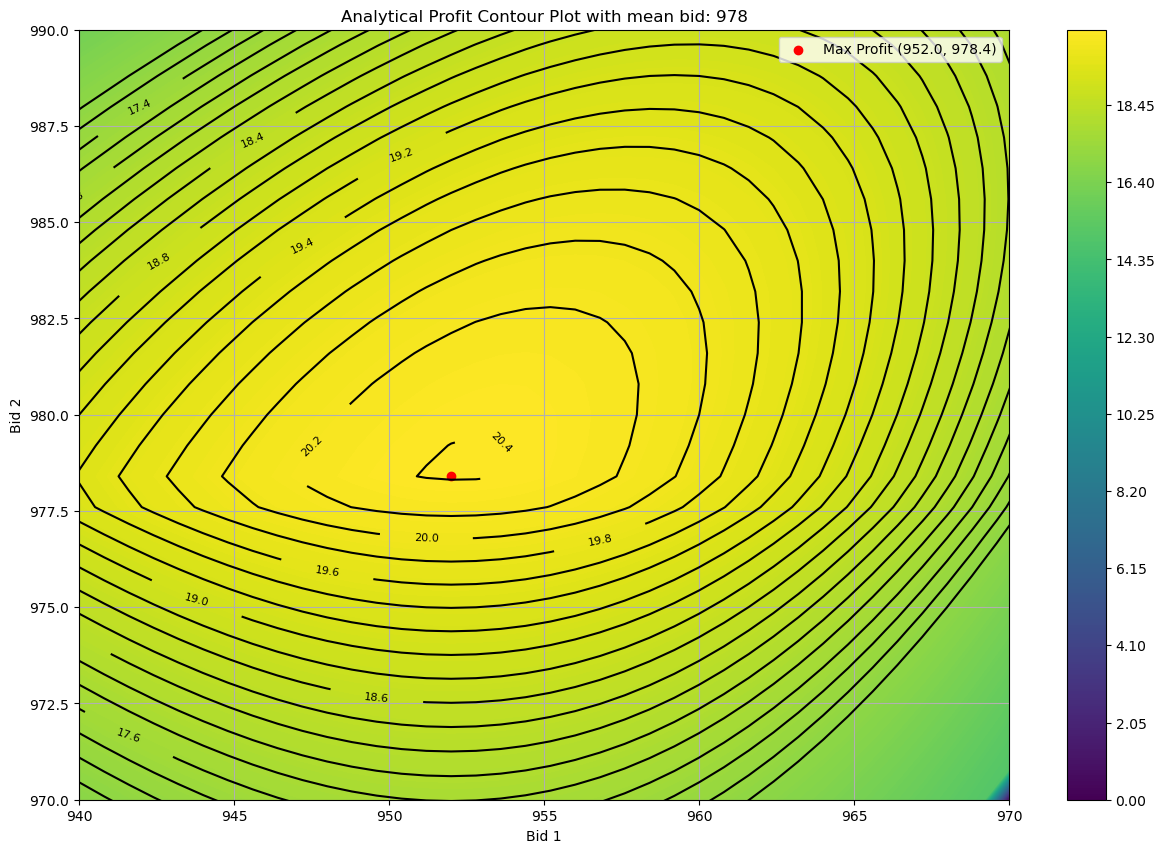

In [51]:
# Contour plot
mean_bid = 978
Profit_plus_1 = profit_matrices_plus[mean_bid]

# Find the indices of the maximum profit for the specific mean_bid of 978
max_indices_plus = np.unravel_index(np.argmax(Profit_plus_1), Profit_plus_1.shape)
max_profit_plus = Profit_plus_1[max_indices_plus]
max_bid1_plus, max_bid2_plus = B1_plus[max_indices_plus], B2_plus[max_indices_plus]

plt.figure(figsize=(15, 10))
contour_filled = plt.contourf(B1_plus, B2_plus, Profit_plus_1, levels=500, cmap='viridis')
contour_lines = plt.contour(B1_plus, B2_plus, Profit_plus_1, levels=np.arange(17, np.max(Profit_plus_1)+0.2, 0.2), colors='k')
plt.colorbar(contour_filled)
plt.scatter(max_bid1_plus, max_bid2_plus, color='red', label=f'Max Profit ({max_bid1_plus:.1f}, {max_bid2_plus:.1f})')
plt.clabel(contour_lines, inline=True, fontsize=8, fmt='%1.1f')
plt.title(f'Analytical Profit Contour Plot with mean bid: {mean_bid}')
plt.xlabel('Bid 1')
plt.ylabel('Bid 2')
plt.legend()
plt.grid(True)

plt.xlim(940, 970)
plt.ylim(970, 990)

plt.show()


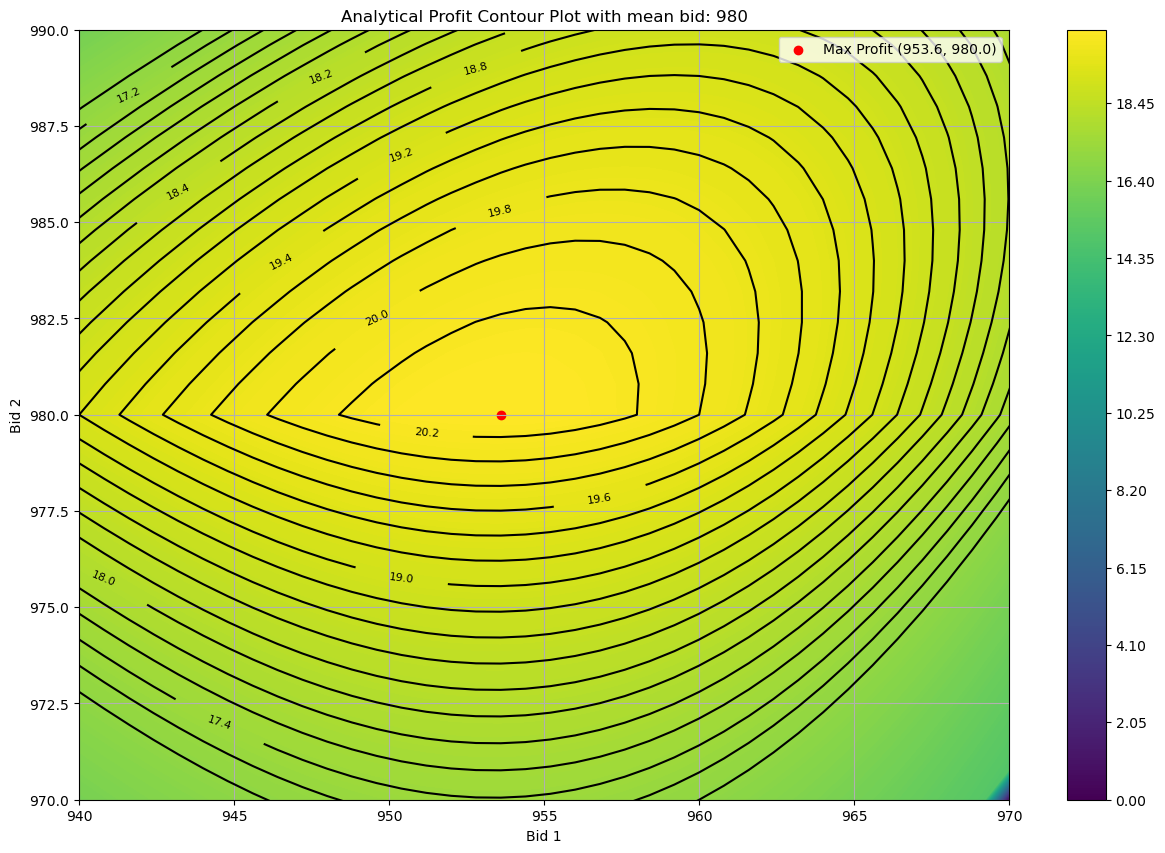

In [54]:
# Contour plot
mean_bid = 980
Profit_plus_1 = profit_matrices_plus[mean_bid]

# Find the indices of the maximum profit for the specific mean_bid of 978
max_indices_plus = np.unravel_index(np.argmax(Profit_plus_1), Profit_plus_1.shape)
max_profit_plus = Profit_plus_1[max_indices_plus]
max_bid1_plus, max_bid2_plus = B1_plus[max_indices_plus], B2_plus[max_indices_plus]

plt.figure(figsize=(15, 10))
contour_filled = plt.contourf(B1_plus, B2_plus, Profit_plus_1, levels=500, cmap='viridis')
contour_lines = plt.contour(B1_plus, B2_plus, Profit_plus_1, levels=np.arange(17, np.max(Profit_plus_1)+0.2, 0.2), colors='k')
plt.colorbar(contour_filled)
plt.scatter(max_bid1_plus, max_bid2_plus, color='red', label=f'Max Profit ({max_bid1_plus:.1f}, {max_bid2_plus:.1f})')
plt.clabel(contour_lines, inline=True, fontsize=8, fmt='%1.1f')
plt.title(f'Analytical Profit Contour Plot with mean bid: {mean_bid}')
plt.xlabel('Bid 1')
plt.ylabel('Bid 2')
plt.legend()
plt.grid(True)

plt.xlim(940, 970)
plt.ylim(970, 990)

plt.show()


In [39]:
# Generate bid values
bid_values_zero = np.linspace(920, 1000, 101)
B1_zero, B2_zero = np.meshgrid(bid_values_zero, bid_values_zero)

# Mean bids range
mean_bids = np.linspace(960, 995, 36)  # From 960 to 995

# Initialize a dictionary to store profit matrices for each mean_bid
profit_matrices = {}

# Compute and store the profit matrices for each mean_bid
for mean_bid in mean_bids:
    Profit_zero = np.zeros_like(B1_zero)
    for i in range(Profit_zero.shape[0]):
        for j in range(Profit_zero.shape[1]):
            if B2_zero[i, j] > B1_zero[i, j]:
                Profit_zero[i, j] = expected_profit_zero(B1_zero[i, j], B2_zero[i, j], mean_bid)
    profit_matrices[mean_bid] = Profit_zero


/var/folders/nm/_864_8xs5yq4fs16m6wrq56h0000gn/T/ipykernel_82381/3259085414.py:90: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, _ = quad(integrand, 900, 1000)


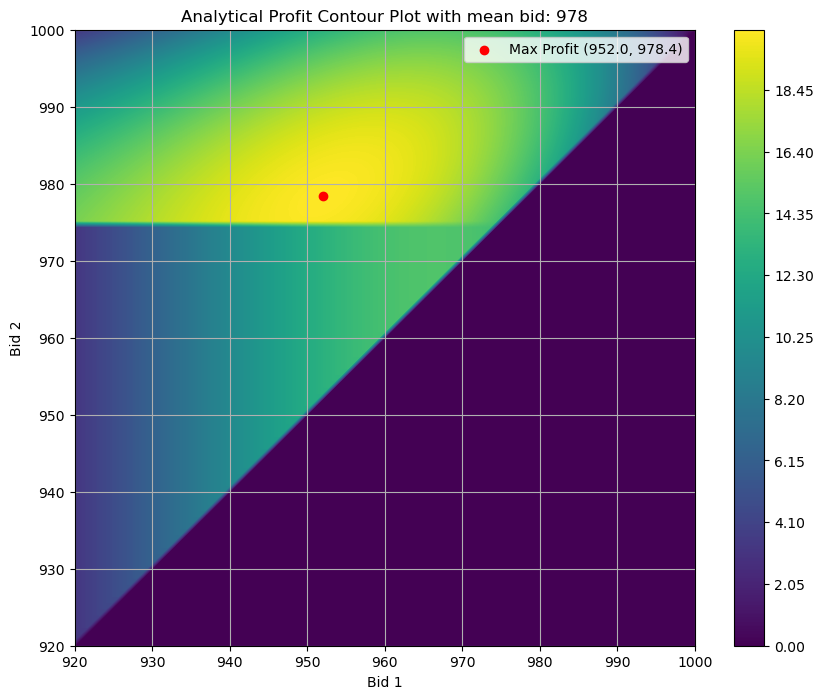

In [40]:
# Contour plot
mean_bid = 978
Profit_plus_1 = profit_matrices[mean_bid]

# Find the indices of the maximum profit for the specific mean_bid of 978
max_indices_plus = np.unravel_index(np.argmax(Profit_plus_1), Profit_plus_1.shape)
max_profit_plus = Profit_plus_1[max_indices_plus]
max_bid1_plus, max_bid2_plus = B1_plus[max_indices_plus], B2_plus[max_indices_plus]

plt.figure(figsize=(10, 8))
contour = plt.contourf(B1_plus, B2_plus, Profit_plus_1, levels=500, cmap='viridis')
plt.colorbar(contour)
plt.scatter(max_bid1_plus, max_bid2_plus, color='red', label=f'Max Profit ({max_bid1_plus}, {max_bid2_plus})')
plt.title(f'Analytical Profit Contour Plot with mean bid: {mean_bid}')
plt.xlabel('Bid 1')
plt.ylabel('Bid 2')
plt.legend()
plt.grid(True)
plt.show()
